# DECISION TREE

* The binary splitting makes this extremely efficient: in a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing the options even among a large number of classes.
* The trick, of course, comes in deciding which questions to ask at each step.
* In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data: that is, each node in the tree splits the data into two groups using a cutoff value within one of the features.

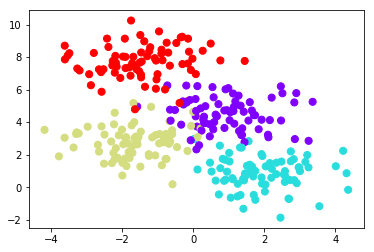

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

### Decision tree iteratively splits data along one or other axis according to some quantitative criteria.


In [7]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
tree = DecisionTreeClassifier().fit(X, y)
# Two features & four possible targets

In [8]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    print(xlim)
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    print(xx.shape)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    return Z

(-4.6223371064746015, 4.7954450743727755)
(200, 200)


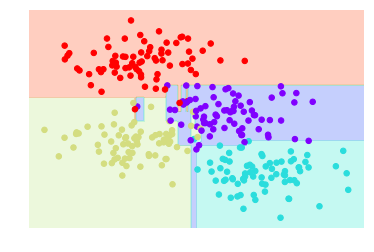

In [9]:
Z = visualize_classifier(DecisionTreeClassifier(), X, y)

In [10]:
Z.shape

(200, 200)

In [15]:
y

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0, 2, 2,
       3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2, 3, 1, 3,
       2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0, 3, 3, 0, 1,
       3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0, 2, 2, 1, 3, 1,
       0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 3, 2, 2, 3,
       0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0, 1, 2, 3, 2, 1, 0, 3,
       0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 2, 2,
       0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0, 2, 3, 0, 2, 1, 2, 0, 3, 2,
       3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0, 3, 1, 1, 2, 1, 2, 0, 3, 3, 0,
       0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0, 1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1,
       0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1, 3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1,
       1, 0, 3, 3, 1, 1, 0, 1, 1, 1, 3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3,
       2])

In [16]:
X

array([[  2.45830537e-02,   2.96215652e+00],
       [ -1.52392631e+00,   7.12573205e+00],
       [  1.27450825e+00,   5.63017322e+00],
       [ -8.65523345e-01,   7.80121774e+00],
       [  7.48740670e-01,   2.55579434e+00],
       [  4.35918422e+00,  -1.62352163e-01],
       [ -1.99576820e+00,   7.16440976e-01],
       [  1.70536064e+00,   4.43277024e+00],
       [  4.90616903e-01,   8.82985441e+00],
       [ -3.52995502e-01,   9.21042408e+00],
       [ -1.83601846e+00,   2.68441560e+00],
       [ -3.61784268e+00,   8.69951232e+00],
       [  1.42013331e+00,   4.63746165e+00],
       [ -2.88089030e+00,   6.26769229e+00],
       [  1.05505217e+00,  -6.47107437e-01],
       [  1.05472929e-01,   3.72493766e+00],
       [  1.13121750e+00,   4.68194985e+00],
       [  2.91209813e+00,   2.46638067e-01],
       [ -7.60240832e-01,   3.27417508e+00],
       [ -7.79715679e-01,   1.72893731e+00],
       [  3.15492712e+00,   1.55292739e+00],
       [  1.59167155e+00,   1.37914513e+00],
       [  

In [17]:
xx,yy = np.meshgrid(np.linspace(-4.5,4.5, num=200),np.linspace(2,10, num=200))

In [18]:
xx.shape

(200, 200)

In [19]:
d = [xx.ravel(),yy.ravel()]

In [20]:
np.c_[d].shape

(2, 40000)

In [21]:
d

[array([-4.5       , -4.45477387, -4.40954774, ...,  4.40954774,
         4.45477387,  4.5       ]),
 array([  2.,   2.,   2., ...,  10.,  10.,  10.])]

In [22]:
d[0]

array([-4.5       , -4.45477387, -4.40954774, ...,  4.40954774,
        4.45477387,  4.5       ])

In [25]:
d[0].shape

(40000,)

In [26]:
np.c_[d]

array([[ -4.5       ,  -4.45477387,  -4.40954774, ...,   4.40954774,
          4.45477387,   4.5       ],
       [  2.        ,   2.        ,   2.        , ...,  10.        ,
         10.        ,  10.        ]])

In [27]:
help(np.c_)

Help on CClass in module numpy.lib.index_tricks object:

class CClass(AxisConcatenator)
 |  Translates slice objects to concatenation along the second axis.
 |  
 |  This is short-hand for ``np.r_['-1,2,0', index expression]``, which is
 |  useful because of its common occurrence. In particular, arrays will be
 |  stacked along their last axis after being upgraded to at least 2-D with
 |  1's post-pended to the shape (column vectors made out of 1-D arrays).
 |  
 |  For detailed documentation, see `r_`.
 |  
 |  Examples
 |  --------
 |  >>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
 |  array([[1, 2, 3, 0, 0, 4, 5, 6]])
 |  
 |  Method resolution order:
 |      CClass
 |      AxisConcatenator
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from AxisConcatenator:
 |  
 |  __getitem__(self, key)
 |  
 |  __getslice__(self, i, j)
 |  
 |  __le

In [28]:
np.c_[xx.ravel(), yy.ravel()].shape

(40000, 2)

In [30]:
Z[0][0]

2

### Decision Tree & over-fitting

Over fitting is a general property of DECISION TREES on increasing depth

# Ensembles of Estimators : Random Forests
Multiple overfitting estimators can be combined to reduce the effect of overfitting.

Random Forest - Ensembling random decision trees to create random forest

(-4.6223371064746015, 4.7954450743727755)
(200, 200)


array([[2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       ..., 
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]])

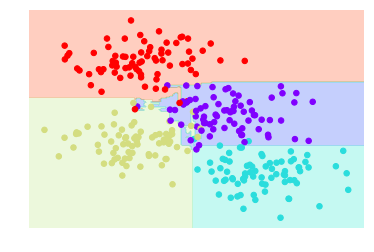

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

(-4.6223371064746015, 4.7954450743727755)
(200, 200)


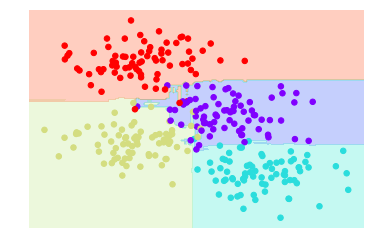

In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=1)
visualize_classifier(model, X, y);

## Random Forest for Classifying DIGITS

In [35]:
from sklearn.datasets import load_digits

In [36]:
digits = load_digits()

In [37]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

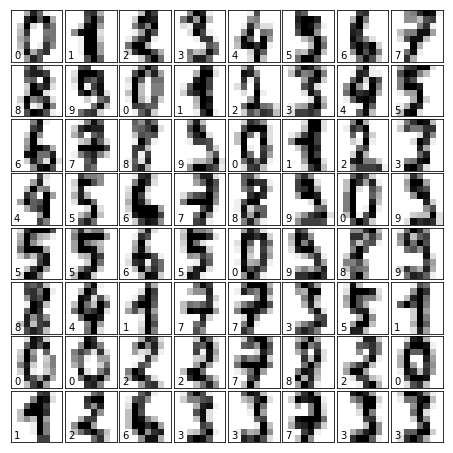

In [38]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
      # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [40]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
digits.target.shape
#1797 is total number of char scans

(1797,)

In [42]:
digits.data[0].reshape(8,8)

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [43]:
digits.target[1]

1

In [44]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [45]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       0.98      0.98      0.98        43
          2       0.95      1.00      0.98        42
          3       0.98      0.96      0.97        46
          4       0.97      1.00      0.99        37
          5       0.98      0.96      0.97        49
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



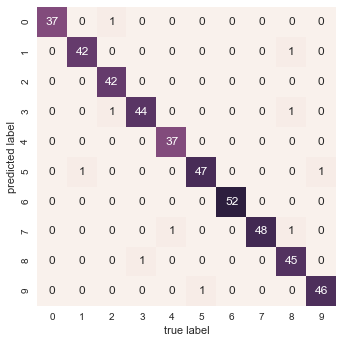

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');